# Final Project
## DS 160 - 01
## McKenzee Masters

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
dataset = pd.read_csv('turnover.csv',engine='python',encoding='latin1')
#there was an encode error but I found this solution on stackoverflow
#the error was 'utf-8' codec can't decode byte 0xf1 in position 1797: invalid continuation byte 

In [3]:
dataset.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


### Checking for missing values

In [5]:
dataset.isna().sum() 
#no missing data points

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

### Removing Unnessary Columns
#### - traffic 
#### - grey wage

In [6]:
dataset = dataset.drop(['traffic', 'greywage'], axis=1)

In [7]:
dataset.head()

,stag,event,gender,age,industry,profession,coach,head_gender,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,no,f,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,no,m,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,no,m,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,no,m,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,yes,f,bus,3.0,4.1,8.0,7.1,3.7


### Renaming columns to better represent contents

In [8]:
dataset.rename(columns = {'stag':'experience', 'head_gender':'supervisor_gender',
                              'way':'work_transportation'}, inplace = True)

In [9]:
dataset.head()

,experience,event,gender,age,industry,profession,coach,supervisor_gender,work_transportation,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,no,f,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,no,m,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,no,m,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,no,m,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,yes,f,bus,3.0,4.1,8.0,7.1,3.7


### Handling Catergorical Data

In [10]:
dataset.columns

Index(['experience', 'event', 'gender', 'age', 'industry', 'profession',
       'coach', 'supervisor_gender', 'work_transportation', 'extraversion',
       'independ', 'selfcontrol', 'anxiety', 'novator'],
      dtype='object')

In [11]:
X=dataset[['experience', 'gender', 'age', 'industry', 'profession', 'coach', 'supervisor_gender', 'work_transportation',
          'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']]
Y=dataset[['event']]

In [12]:
X=pd.get_dummies(dataset[['experience', 'gender', 'age', 'industry', 'profession', 'coach', 'supervisor_gender', 
                          'work_transportation', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']], 
                 drop_first=False)

In [13]:
X.head() #1=yes, 0=no

,experience,age,extraversion,independ,selfcontrol,anxiety,novator,gender_f,gender_m,industry_ HoReCa,...,profession_etc,profession_manage,coach_my head,coach_no,coach_yes,supervisor_gender_f,supervisor_gender_m,work_transportation_bus,work_transportation_car,work_transportation_foot
0,7.030801,35.0,6.2,4.1,5.7,7.1,8.3,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1,22.965092,33.0,6.2,4.1,5.7,7.1,8.3,0,1,0,...,0,0,0,1,0,0,1,1,0,0
2,15.934292,35.0,6.2,6.2,2.6,4.8,8.3,1,0,0,...,0,0,0,1,0,0,1,1,0,0
3,15.934292,35.0,5.4,7.6,4.9,2.5,6.7,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,8.410678,32.0,3.0,4.1,8.0,7.1,3.7,0,1,0,...,0,0,0,0,1,1,0,1,0,0


### Spliting the Dataset into Test and Training

### 20% test, 80% train

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                              test_size=0.2,
                                              random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

#### Checking accuracy of 20 test/80 train split

In [18]:
Y_pred=classifier.predict(X_test.values)

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[76 32]
 [44 74]]


#### 77 true negative, 41 false negative, 77 true positive, 31 false positive

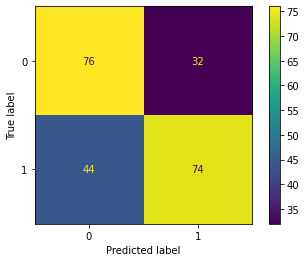

In [20]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.70      0.67       108
           1       0.70      0.63      0.66       118

    accuracy                           0.66       226
   macro avg       0.67      0.67      0.66       226
weighted avg       0.67      0.66      0.66       226



### 30% test, 70% train

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                              test_size=0.3,
                                              random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

#### Checking accuracy of 30 test/70 train split

In [24]:
Y_pred=classifier.predict(X_test.values)

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[112  49]
 [ 77 101]]


#### 114 true negative, 74 false negative, 104 true positive, 47 false positive

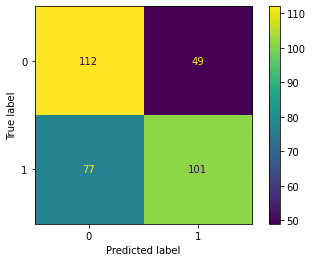

In [26]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       161
           1       0.67      0.57      0.62       178

    accuracy                           0.63       339
   macro avg       0.63      0.63      0.63       339
weighted avg       0.63      0.63      0.63       339



### 40% test, 60% train

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                              test_size=0.4,
                                              random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

#### Checking accuracy of 40 test/60 train split

In [30]:
Y_pred=classifier.predict(X_test.values)

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[139  78]
 [102 133]]


#### 142 true negative, 101 false negative, 135 true positive, 75 false positive

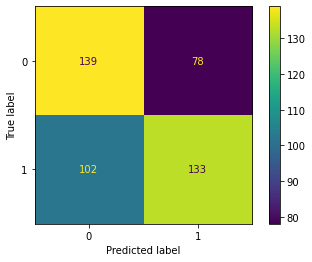

In [32]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       217
           1       0.63      0.57      0.60       235

    accuracy                           0.60       452
   macro avg       0.60      0.60      0.60       452
weighted avg       0.60      0.60      0.60       452



### 10% test, 90% training

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                              test_size=0.1,
                                              random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=10000)
classifier.fit(X_train.values,Y_train.values.ravel())

LogisticRegression(max_iter=10000)

#### Checking accuracy of 10 test/90 train split

In [37]:
Y_pred=classifier.predict(X_test.values)

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[37 20]
 [19 37]]


#### 35 true negative, 20 false negative, 36 true positive, 22 false positive

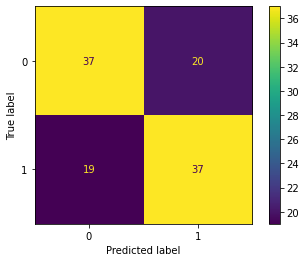

In [39]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65        57
           1       0.65      0.66      0.65        56

    accuracy                           0.65       113
   macro avg       0.65      0.65      0.65       113
weighted avg       0.65      0.65      0.65       113

